# Thử thách: Phân tích văn bản về Khoa học Dữ liệu

Trong ví dụ này, chúng ta sẽ thực hiện một bài tập đơn giản bao gồm tất cả các bước của quy trình khoa học dữ liệu truyền thống. Bạn không cần phải viết bất kỳ mã nào, chỉ cần nhấp vào các ô bên dưới để thực thi và quan sát kết quả. Như một thử thách, bạn được khuyến khích thử nghiệm mã này với các dữ liệu khác nhau.

## Mục tiêu

Trong bài học này, chúng ta đã thảo luận về các khái niệm khác nhau liên quan đến Khoa học Dữ liệu. Hãy cùng khám phá thêm các khái niệm liên quan bằng cách thực hiện **khai thác văn bản**. Chúng ta sẽ bắt đầu với một văn bản về Khoa học Dữ liệu, trích xuất các từ khóa từ đó, và sau đó cố gắng trực quan hóa kết quả.

Làm văn bản, tôi sẽ sử dụng trang về Khoa học Dữ liệu từ Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Bước 1: Lấy dữ liệu

Bước đầu tiên trong mọi quy trình khoa học dữ liệu là lấy dữ liệu. Chúng ta sẽ sử dụng thư viện `requests` để thực hiện điều này:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Bước 2: Chuyển đổi dữ liệu

Bước tiếp theo là chuyển đổi dữ liệu sang dạng phù hợp để xử lý. Trong trường hợp này, chúng ta đã tải xuống mã nguồn HTML từ trang web và cần chuyển đổi nó thành văn bản thuần túy.

Có nhiều cách để thực hiện việc này. Chúng ta sẽ sử dụng đối tượng [HTMLParser](https://docs.python.org/3/library/html.parser.html) tích hợp sẵn đơn giản nhất từ Python. Chúng ta cần kế thừa lớp `HTMLParser` và định nghĩa mã để thu thập tất cả văn bản bên trong các thẻ HTML, ngoại trừ các thẻ `<script>` và `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Bước 3: Thu thập thông tin chi tiết

Bước quan trọng nhất là chuyển đổi dữ liệu của chúng ta thành một dạng mà từ đó chúng ta có thể rút ra thông tin chi tiết. Trong trường hợp này, chúng ta muốn trích xuất các từ khóa từ văn bản và xem từ khóa nào có ý nghĩa hơn.

Chúng ta sẽ sử dụng thư viện Python có tên [RAKE](https://github.com/aneesha/RAKE) để trích xuất từ khóa. Đầu tiên, hãy cài đặt thư viện này nếu nó chưa được cài đặt:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Chức năng chính có sẵn từ đối tượng `Rake`, mà chúng ta có thể tùy chỉnh bằng một số tham số. Trong trường hợp của chúng ta, chúng ta sẽ đặt độ dài tối thiểu của một từ khóa là 5 ký tự, tần suất tối thiểu của một từ khóa trong tài liệu là 3, và số lượng từ tối đa trong một từ khóa là 2. Hãy thoải mái thử nghiệm với các giá trị khác và quan sát kết quả.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Chúng tôi đã thu thập một danh sách các thuật ngữ cùng với mức độ quan trọng liên quan. Như bạn có thể thấy, các lĩnh vực quan trọng nhất, chẳng hạn như học máy và dữ liệu lớn, xuất hiện ở các vị trí đầu tiên trong danh sách.

## Bước 4: Trực quan hóa kết quả

Con người thường hiểu dữ liệu tốt nhất dưới dạng trực quan. Vì vậy, việc trực quan hóa dữ liệu để rút ra một số thông tin thường rất hợp lý. Chúng ta có thể sử dụng thư viện `matplotlib` trong Python để vẽ phân bố đơn giản của các từ khóa cùng với mức độ liên quan của chúng:


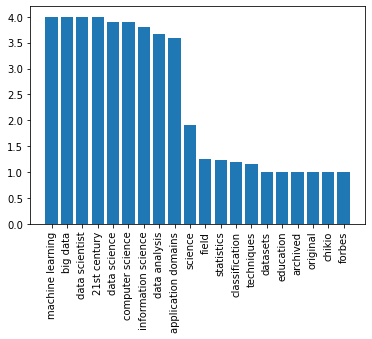

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Tuy nhiên, có một cách thậm chí tốt hơn để hình dung tần suất từ - sử dụng **Word Cloud**. Chúng ta sẽ cần cài đặt một thư viện khác để vẽ đám mây từ từ danh sách từ khóa của mình.


In [71]:
!{sys.executable} -m pip install wordcloud

Đối tượng `WordCloud` chịu trách nhiệm nhận vào hoặc văn bản gốc, hoặc danh sách các từ đã được tính toán trước với tần suất của chúng, và trả về một hình ảnh, sau đó có thể được hiển thị bằng cách sử dụng `matplotlib`:


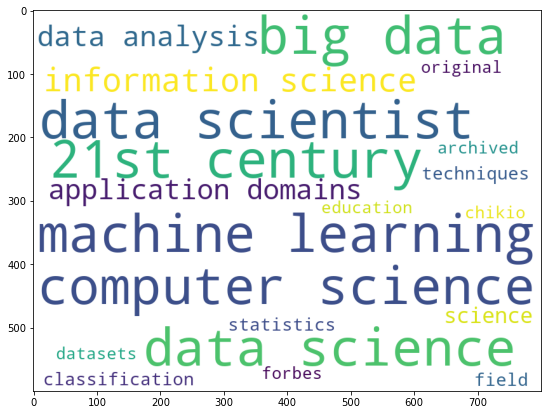

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Chúng ta cũng có thể truyền văn bản gốc vào `WordCloud` - hãy xem liệu chúng ta có thể đạt được kết quả tương tự không:


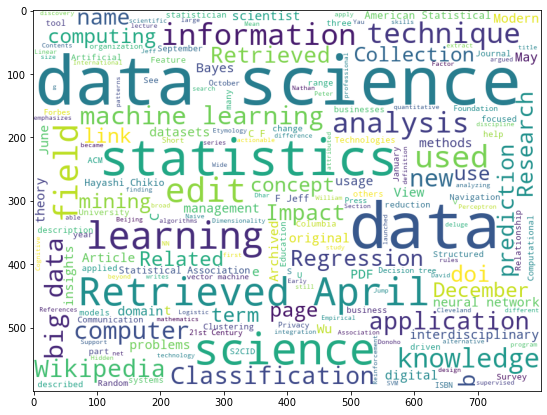

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Bạn có thể thấy rằng đám mây từ giờ đây trông ấn tượng hơn, nhưng nó cũng chứa rất nhiều nhiễu (ví dụ: các từ không liên quan như `Retrieved on`). Ngoài ra, chúng ta nhận được ít từ khóa hơn bao gồm hai từ, chẳng hạn như *data scientist* hoặc *computer science*. Điều này là do thuật toán RAKE làm tốt hơn nhiều trong việc chọn ra các từ khóa chất lượng từ văn bản. Ví dụ này minh họa tầm quan trọng của việc tiền xử lý và làm sạch dữ liệu, bởi vì một bức tranh rõ ràng ở cuối sẽ cho phép chúng ta đưa ra các quyết định tốt hơn.

Trong bài tập này, chúng ta đã đi qua một quy trình đơn giản để trích xuất một số ý nghĩa từ văn bản Wikipedia, dưới dạng từ khóa và đám mây từ. Ví dụ này khá đơn giản, nhưng nó minh họa rõ ràng tất cả các bước điển hình mà một nhà khoa học dữ liệu sẽ thực hiện khi làm việc với dữ liệu, bắt đầu từ việc thu thập dữ liệu cho đến khi trực quan hóa.

Trong khóa học của chúng ta, chúng ta sẽ thảo luận chi tiết về tất cả các bước đó.



---

**Tuyên bố miễn trừ trách nhiệm**:  
Tài liệu này đã được dịch bằng dịch vụ dịch thuật AI [Co-op Translator](https://github.com/Azure/co-op-translator). Mặc dù chúng tôi cố gắng đảm bảo độ chính xác, xin lưu ý rằng các bản dịch tự động có thể chứa lỗi hoặc không chính xác. Tài liệu gốc bằng ngôn ngữ bản địa nên được coi là nguồn tham khảo chính thức. Đối với các thông tin quan trọng, nên sử dụng dịch vụ dịch thuật chuyên nghiệp từ con người. Chúng tôi không chịu trách nhiệm cho bất kỳ sự hiểu lầm hoặc diễn giải sai nào phát sinh từ việc sử dụng bản dịch này.
